# **Machine Learning based Gestational Diabetic Prediction**

PregnanciesNumber of times pregnant

Glucose Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressureDiastolic blood pressure (mm Hg)

SkinThicknessTriceps skin fold thickness (mm)

Insulin2-Hour serum insulin (mu U/ml)

BMIBody mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunctionDiabetes pedigree function

AgeAge (years)

OutcomeClass variable (0 or 1) 268 of 768 are 1, the others are 0

In [1]:
import numpy as np
import sklearn
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd




In [2]:
dataset = pd.read_csv("diabetes.csv")

data = dataset.iloc[:,0:8].values
labels = dataset.iloc[:,8].values

In [3]:
dataset.head().



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.844850,121.032595,69.140808,20.538462,80.264668,31.995437,0.472206,33.280313,0.349413
std,3.372933,32.026510,19.382463,15.964656,115.538207,7.880592,0.331479,11.800934,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='count', ylabel='Outcome'>

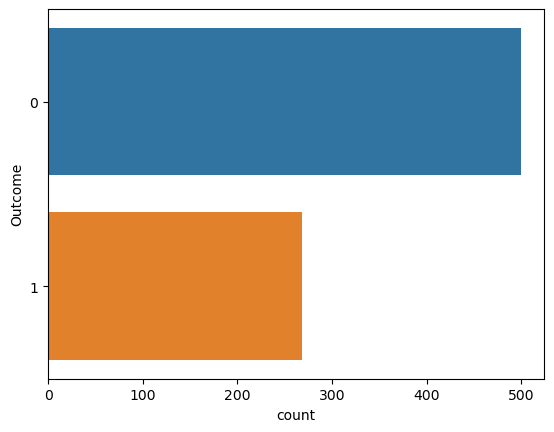

In [8]:
sns.countplot(data=dataset,y=dataset['Outcome'])

c:\Users\Prakash Bhat\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


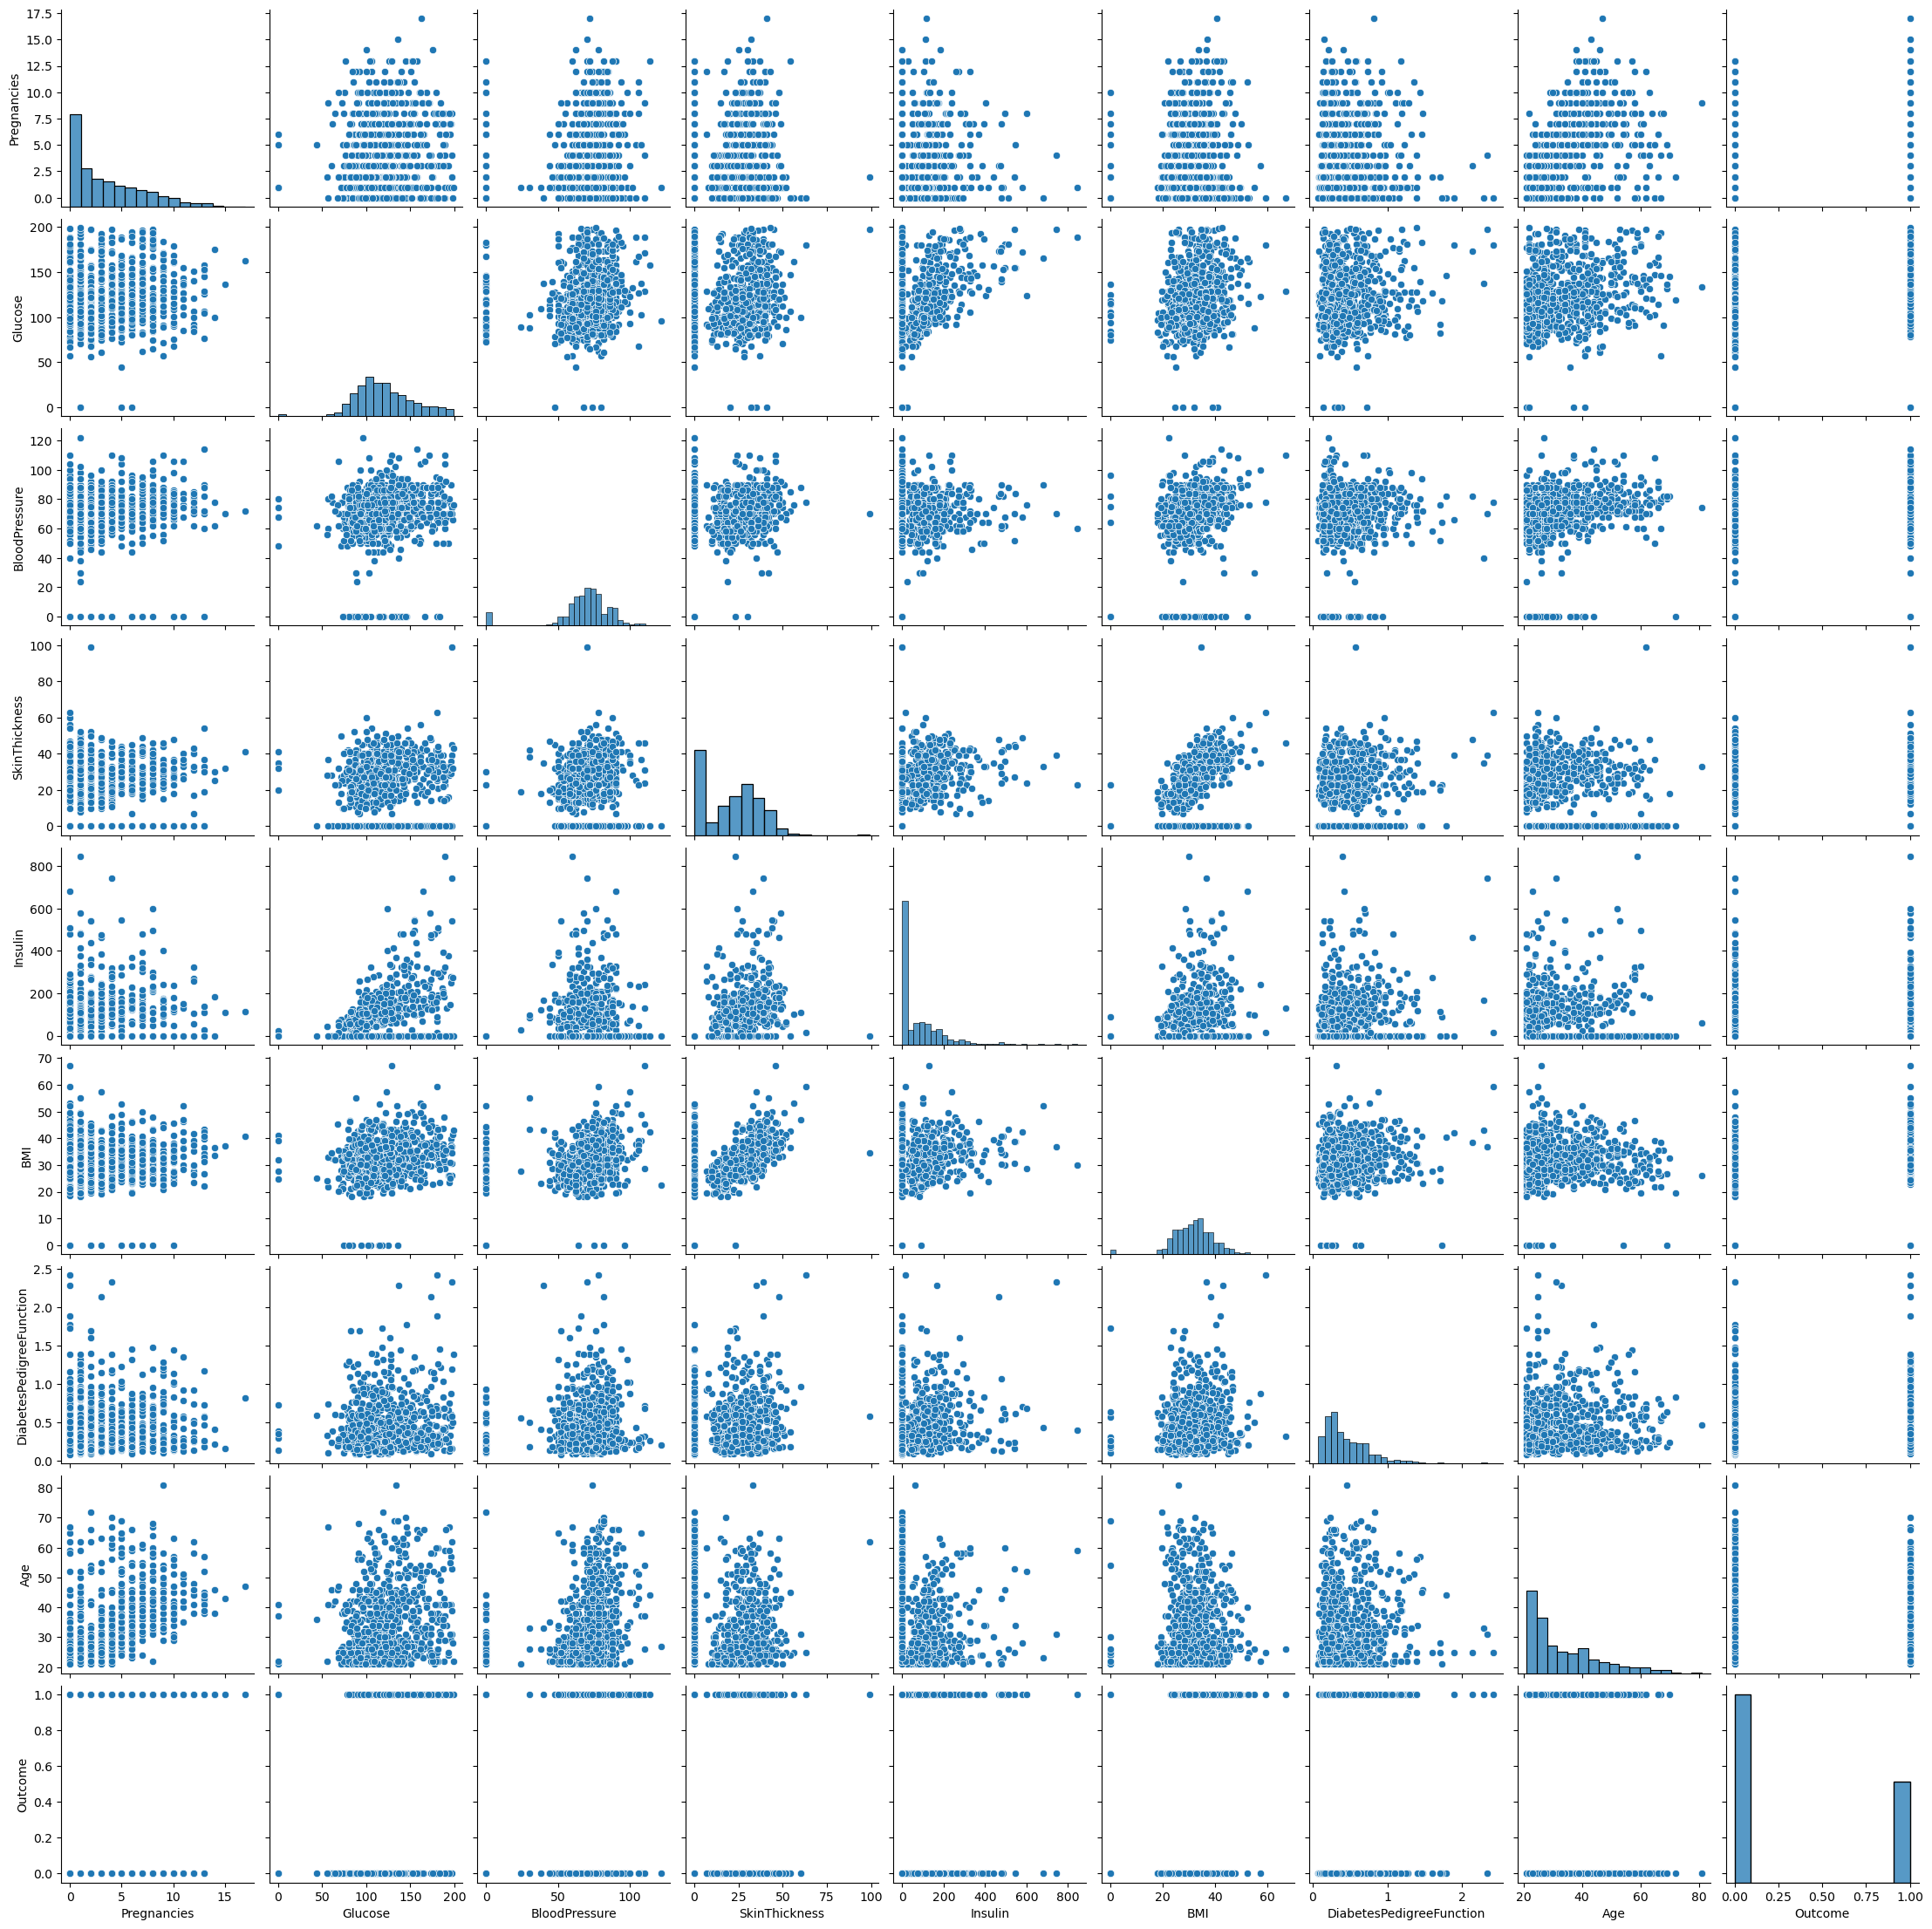

In [9]:
sns.pairplot(data=dataset)

<Axes: xlabel='Age', ylabel='Count'>

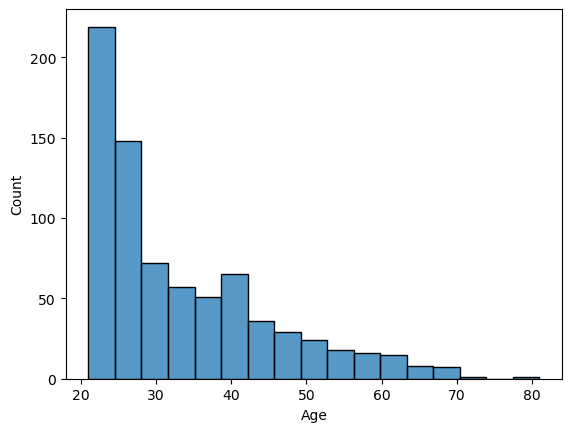

In [10]:
sns.histplot(data=dataset,x=dataset['Age'])

<Axes: xlabel='Pregnancies', ylabel='Count'>

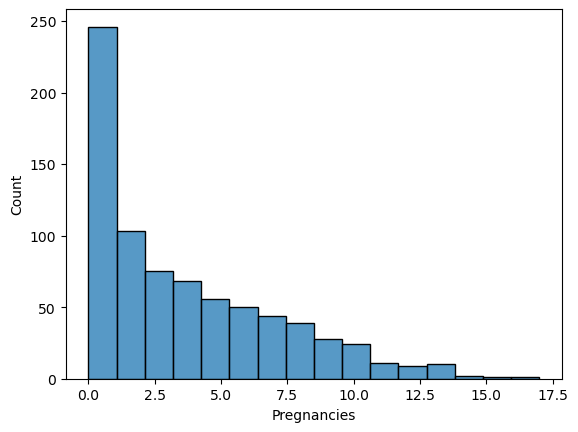

In [11]:
sns.histplot(data=dataset,x=dataset['Pregnancies'])

In [12]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25, random_state=42)

# **Decision Trees**

![alt text](https://drive.google.com/uc?id=1x5droBZwH8RB4nqE77owjcb3m_aOBgvU)


In [13]:
#splitter = best, random , max_features = int, auto, log, none
model = DecisionTreeClassifier(random_state=84,splitter='best', max_features=8)

print("[INFO] training model...")
model.fit(trainData, trainLabels)


print("[INFO] evaluating...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

[INFO] training model...
[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       124
           1       0.59      0.63      0.61        68

    accuracy                           0.71       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.72      0.71      0.72       192



# **Random Forest**

![alt text](https://drive.google.com/uc?id=1JRk2b-NbpsTbRALKDzIJngfUjOZvj8gk)

In [14]:
model = RandomForestClassifier(n_estimators=10, random_state=42,)# n_estimators means no of decision trees includfed in the random forest
print("[INFO] training model...")
model.fit(trainData, trainLabels)


print("[INFO] evaluating...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))



[INFO] training model...
[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       124
           1       0.68      0.57      0.62        68

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



# **KNN**

![alt text](https://drive.google.com/uc?id=12O0KRMCL0aO9wIebmPoAmfQdHgLBs4Gt)

In [15]:
#weights = uniform, weights
model = KNeighborsClassifier(n_neighbors=9)
print("[INFO] training model...")
model.fit(trainData, trainLabels)


print("[INFO] evaluating...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

[INFO] training model...
[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       124
           1       0.60      0.60      0.60        68

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192



# **SVM**

![alt text](https://drive.google.com/uc?id=1I48gEU3IMSFRriv-Uv2qVXy1bJqIrBaz)

![alt text](https://drive.google.com/uc?id=1qENQ38k3MwqjAyjc19j-zEvbEIfvYI9Z)

**The C parameter** trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a regularization parameter in the SVM




In [16]:
#kernel='rbf', linear, poly, C=1, 
model = SVC(kernel="linear",C=1)
print("[INFO] training model...")
model.fit(trainData, trainLabels)


print("[INFO] evaluating...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

import joblib # joblib is used to save the trained model in to a file
joblib.dump(model,'model.pkl')

[INFO] training model...


[INFO] evaluating...
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       124
           1       0.71      0.59      0.65        68

    accuracy                           0.77       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.77      0.77       192



['model.pkl']

# **Logistic Regression**

![alt text](https://drive.google.com/uc?id=1N2HJHTUlzSj6jqD8b61pYbCYo_rhXaYS)